<a href="https://www.kaggle.com/code/juliaconeda/projeto-churn-banco-cart-o-de-cr-dito?scriptVersionId=180978201" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Temos uma base de **churn** de clientes de um banco que possuem Cartão de Crédito, e o **objetivo** é entender o motivo da evasão desses clientes, qual o perfil de cliente que está saindo e realizar uma previsão de saída dos clientes ativos na base.

### Descrição das colunas da base

##### * **CLIENTNUM:** Identificador exclusivo do cliente.
##### * **Attrition_Flag:** Indica se a conta do cliente está ativa ou foi cancelada.
##### * **Customer_Age:** Idade do cliente.
##### * **Gender:** Gênero do cliente.
##### * **Dependent_count:** Número de dependentes do cliente.
##### * **Education_Level:** Nível educacional do cliente.
##### * **Marital_Status:** Estado civil do cliente.
##### * **Income_Category:** Faixa de renda do cliente.
##### * **Card_Category:** Categoria do cartão de crédito do cliente.
##### * **Months_on_book:** Número de meses que o cliente é cliente do banco.
##### * **Total_Relationship_Count:** Quantidade total de produtos bancários em poder do cliente.
##### * **Months_Inactive_12_mon:** Número de meses com inatividade nos últimos 12 meses.
##### * **Contacts_Count_12_mon:** Quantidade de contatos com o banco nos últimos 12 meses.
##### * **Credit_Limit:** Limite de crédito no cartão de crédito.
##### * **Total_Revolving_Bal:** Saldo total rotativo do cartão de crédito.
##### * **Avg_Open_To_Buy:** Média da linha de crédito aberta para compra no cartão de crédito.
##### * **Total_Amt_Chng_Q4_Q1:** Alteração no valor da transação nos últimos quatro trimestres.
##### * **Total_Trans_Amt:** Valor total da transação nos últimos 12 meses.
##### * **Total_Trans_Ct:** contagem total de transações nos últimos 12 meses.
##### * **Total_Ct_Chng_Q4_Q1:** Alteração na contagem de transações nos últimos quatro trimestres.
##### * **Avg_Utilization_Ratio:** Taxa média de utilização do cartão de crédito.

# Importanto as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Carregando a base e iniciando tratamentos

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
df = df[df.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


> #### Olhando se existe cliente duplicado

In [3]:
duplicateRows = df[df. duplicated (['CLIENTNUM'])]
duplicateRows

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


> #### Olhando se existe campo vazio

In [4]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

> #### Renomeando o nome das colunas e incluindo coluna de faixa etária

In [5]:
df.columns = [s.lower() for s in df.columns.tolist()]
df.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [6]:
idades = df['customer_age'].drop_duplicates().sort_values().tolist()
idades

[26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 73]

In [7]:
intervalo = [26, 30, 35, 40, 45, 50, 55, 60, 65, 100]
faixa = ['26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
df['age_group'] = pd.cut(df['customer_age'], bins=intervalo, labels=faixa, right=False)

## Explorando o Dataframe

### Aqui podemos ver a distribuição por gênero e faixa etária dos clientes, onde a concentração maior está entre 36 à 60 anos

In [8]:
age_group_gen = df.groupby(['age_group', 'gender']).size().unstack().fillna(0)
age_group_gen

/tmp/ipykernel_18/1950436929.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



gender,F,M
age_group,,
26-30,93,102
31-35,273,267
36-40,683,618
41-45,1127,1012
46-50,1283,1139
51-55,1037,883
56-60,582,496
61-65,221,200
66+,59,52


### Podemos ver que a distribuição dos clientes por gênero é bastante proporcional, não havendo concentração

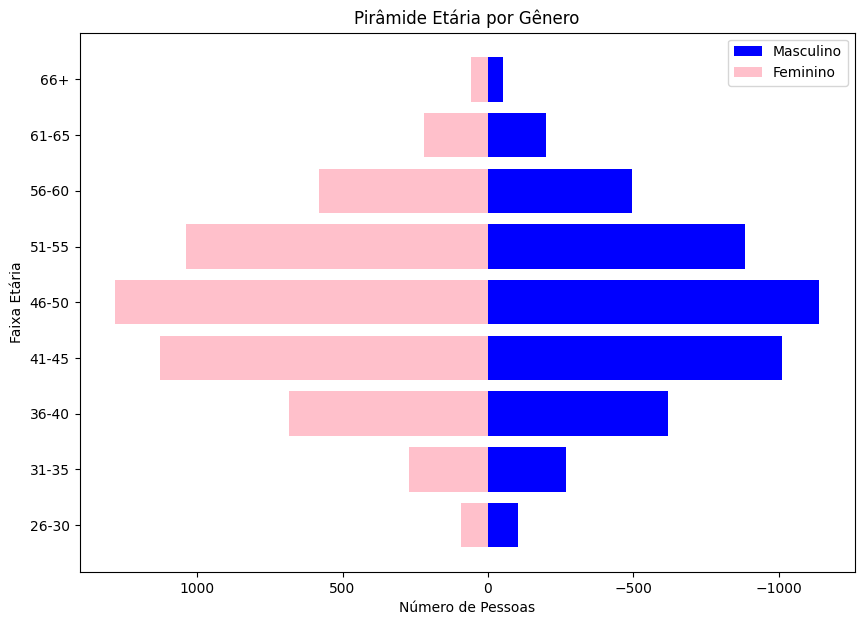

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
colors = {'M':'blue', 'F':'pink'}

# Dados masculinos à esquerda e femininos à direita
ax.barh(age_group_gen.index, -age_group_gen['M'], color=colors['M'], label='Masculino')
ax.barh(age_group_gen.index, age_group_gen['F'], color=colors['F'], label='Feminino')

# Adicionando rótulo dos dados
# for bar in bars_m:
#     width = -bar.get_width()
#     ax.text(width - 0.1, bar.get_y() + bar.get_height() / 2, str(int(width)),
#            va='center', ha='left', color='black')

# for bar in bars_f:
#     width = bar.get_width()
#     ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, str(int(width)),
#            va='center', ha='right', color='black')

# Configurando gráfico
ax.set_xlabel('Número de Pessoas')
ax.set_ylabel('Faixa Etária')
ax.set_title('Pirâmide Etária por Gênero')
ax.legend()

ax.set_yticks(age_group_gen.index)
ax.set_yticklabels(age_group_gen.index)

ax.invert_xaxis()
plt.show()

### Os clientes possuem uma concentração na categoria mais básica de cartão

<Axes: xlabel='card_category'>

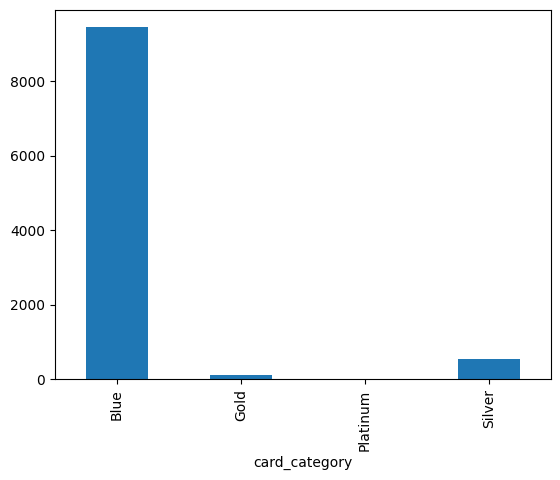

In [10]:
df.groupby('card_category')['gender'].count().plot(kind='bar')

### A tabela abaixo nos mostra que a faixa de renda não dita regra para enquadramento da categoria do cartão. Apesar da renda não ser a única informação necessária para liberar crédito ao cliente (é necessário ver *score*, dívidas, etc), é uma das informações mais importantes. Podemos ter essa informação como uma possível ***red flag*** da análise, já que sabemos que as categorias mais premium oferecem uma série de outras vantagens para o cliente e a base mostra que o banco não possui uma padronização para definir isso.

### É possível também identificar que os clientes do gênero Masculino possuem uma faixa de renda superior às clientes do gênero Feminino.

In [11]:
category_card = df.groupby(['gender', 'income_category', 'card_category']).size().unstack().fillna(0)
category_card.reset_index()
category_card

card_category             Blue  Gold  Platinum  Silver
gender income_category                                
F      $40K - $60K       960.0   7.0       0.0    47.0
       Less than $40K   3146.0  22.0       4.0   112.0
       Unknown           995.0   9.0       5.0    51.0
M      $120K +           645.0  18.0       4.0    60.0
       $40K - $60K       715.0   8.0       1.0    52.0
       $60K - $80K      1273.0  29.0       4.0    96.0
       $80K - $120K     1395.0  21.0       2.0   117.0
       Less than $40K    257.0   2.0       0.0    18.0
       Unknown            50.0   0.0       0.0     2.0

### Identificando que 16% de clientes da base evadiram

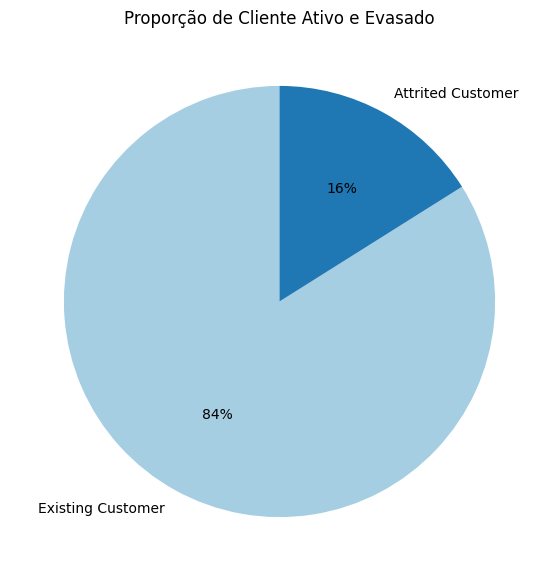

In [12]:
attrited=df['attrition_flag'].value_counts()
sns.set_palette('Paired')
plt.figure(figsize=(10,7))
labels=attrited.index
sizes=attrited.values
plt.title('Proporção de Cliente Ativo e Evasado')
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90)
plt.show()

### O gráfico abaixo aponta que os clientes evadidos já possuiam uma quantidade menor de produtos do que os clientes que permanecem com relacionamento ativo

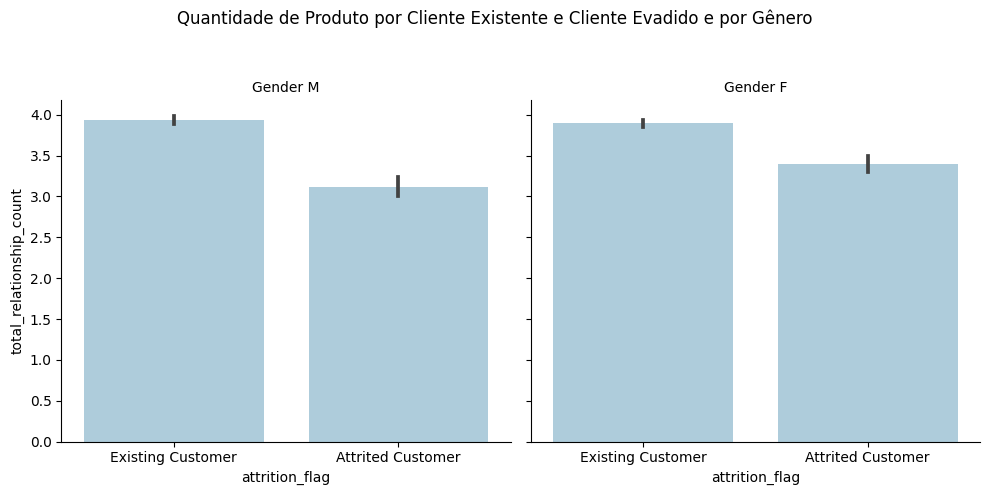

In [13]:
g = sns.FacetGrid(df, col='gender', col_wrap=2, height=5, aspect=1)
g.map(sns.barplot, 'attrition_flag', 'total_relationship_count', order=['Existing Customer', 'Attrited Customer'])
g.set_titles('Gender {col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Quantidade de Produto por Cliente Existente e Cliente Evadido e por Gênero')
plt.show()

### O gráfico abaixo mostra o diferente comportamento dos clientes ativos e dos clientes evadidos, quanto à quantidade e valor de transação realizados nos últimos 12 meses.
* ### Podemos perceber que os **clientes evadidos** possuem a tendência de fazer **menos transações e em valores menores**. 
* ### Já os **clientes existentes**, possuem um comportamento de transação mais variado, com **valores diversos e maior quantidade**.

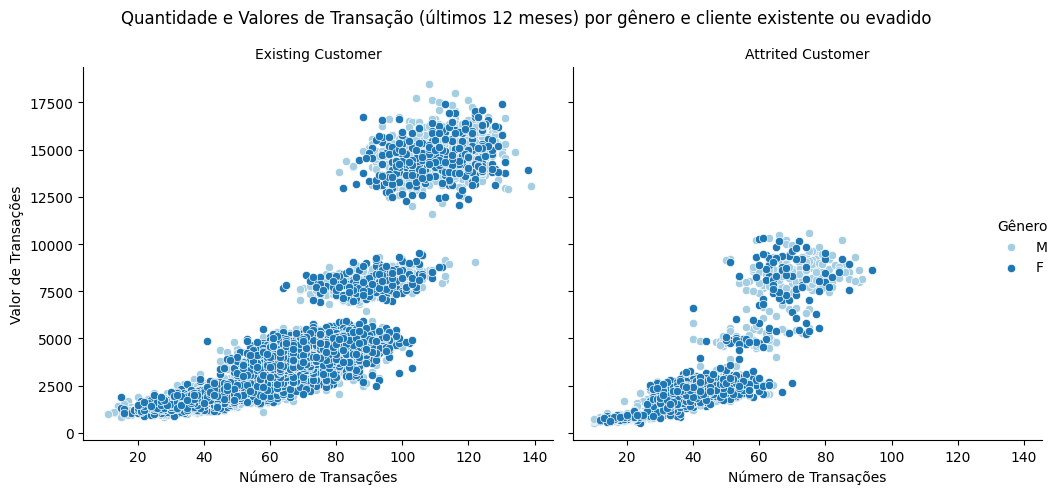

In [14]:
g = sns.FacetGrid(df, col='attrition_flag', hue='gender', col_wrap=2, height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x='total_trans_ct', y='total_trans_amt')
g.set_titles('{col_name}')
g.set_axis_labels('Número de Transações', 'Valor de Transações')
g.add_legend(title='Gênero')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Quantidade e Valores de Transação (últimos 12 meses) por gênero e cliente existente ou evadido')
plt.tight_layout()
plt.show()

### Dos 16% que compõe os clientes evadidos, a maior parte é do gênero Feminino

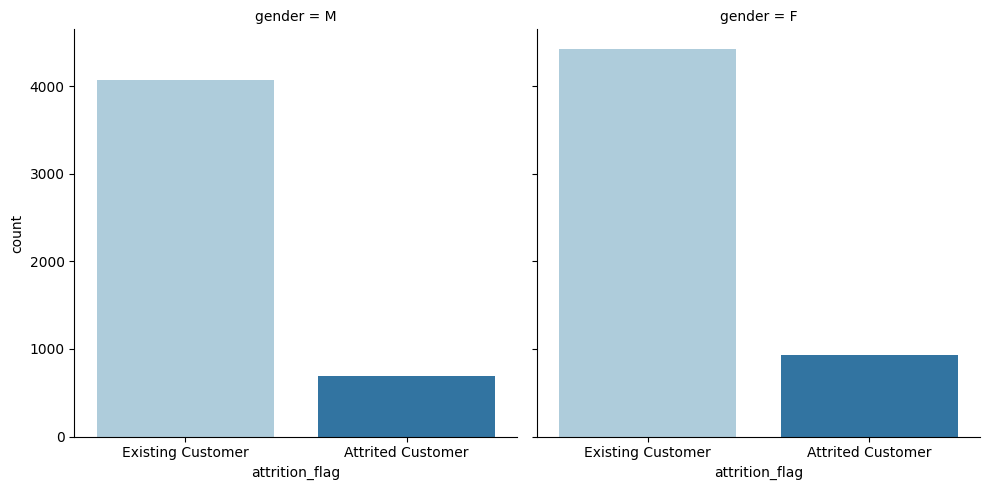

In [15]:
sns.catplot(x='attrition_flag', col='gender', kind='count', data=df, palette='Paired')

### Abaixo é possível constatar que, entre os clientes evadidos, temos **30% a mais** clientes do **gênero Feminino** do que do gênero Masculino

In [16]:
category_card_churn = df.groupby(['attrition_flag', 'gender', 'card_category']).size().unstack().fillna(0)
category_card_churn.reset_index()
category_card_churn['total'] = category_card_churn.sum(axis=1)
category_card_churn

card_category             Blue  Gold  Platinum  Silver  total
attrition_flag    gender                                     
Attrited Customer F        890     8         4      28    930
                  M        629    13         1      54    697
Existing Customer F       4211    30         5     182   4428
                  M       3706    65        10     291   4072

### No quadro abaixo, conseguimos aumentar essa granularidade e ver que clientes evadidos do gênero **Feminino, casadas e solteiras**, com faixa de **renda menor que R$ 40 mil** e estão majoritariamente entre as faixas etárias **de 36-40 e 51-55 anos** Os clientes do gênero **Masculino**, também são **casados ou solteiros**, porém estão **mais distribuidos entre as faixas de renda e de idade.**

In [17]:
costumer_profile = df.groupby(['gender', 'age_group', 'attrition_flag', 'marital_status', 'income_category']).size().reset_index(name='Quantidade')
pivot_t = pd.pivot_table(costumer_profile, values = 'gender', index=['gender', 'marital_status', 'income_category'], columns=['attrition_flag', 'age_group'], aggfunc='sum', fill_value=0)
styled_pivot_table = pivot_t.style.background_gradient(cmap='Reds')
styled_pivot_table

/tmp/ipykernel_18/490989749.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_18/490989749.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



## Modelo Preditivo

> #### Criando uma coluna binária para identificação de cliente ativo e cliente evadido

In [18]:
df['status'] = df['attrition_flag'].map({'Existing Customer':0, 'Attrited Customer':1})

> #### Informando as colunas que a máquina deve usar para o treino e teste (Número de Transações e Valores de Transações)

* ##### y_teste são as verdadeiras classes (0 para cliente ativo e 1 para cliente evadido)
* ##### y_pred são as classes previstas pelo modelo
* ##### accuracy_score calcula a acurácia, comparando as calsses verdadeiras com as classes previstas pelo modelo

In [19]:
X = df[['total_trans_ct', 'total_trans_amt']]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### A **Acurácia** do modelo é de aproximadamente **89%** (ou seja, cerca de 89% das previsões do modelo estão corretas).

### **Matriz de Confusão:** 
> #### Verdadeiro Negativo - 1608 clientes ativos corretamente identificados como ativos
> #### Falso Positivo - 91 clientes ativos incorretamente identificados como evadidos
> #### Falso Negativo - 134 clientes evadidos incorretamente identificados como ativos
> #### Verdadeiro Positivo - 193 clientes evadidos corretamente identificados como evadidos

### **Previsão:**
> #### **Clientes Ativos (Classe 0):** Precisão de 92%, onde 95% dos clientes ativos foram corretamente identificados como ativos (Recall)
> #### **Clientes Evadidos (Classe 1):** Precisão de 68%, onde 59% dos clientes evadidos foram corretamente identificados como evadidos (Recall)

### O modelo tem um desempenho melhor em identificar os clientes ativos corretamente, visto que a base de estudo possui somente 16% de cliente evadido, o que é uma porcentagem baixa para treinar um modelo

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8889437314906219
Confusion Matrix:
 [[1608   91]
 [ 134  193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1699
           1       0.68      0.59      0.63       327

    accuracy                           0.89      2026
   macro avg       0.80      0.77      0.78      2026
weighted avg       0.88      0.89      0.89      2026



In [22]:
df_existing_customer = df[df['attrition_flag'] == 'Existing Customer']
df_existing_customer

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,age_group,status
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,46-50,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,46-50,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,51-55,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,41-45,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,41-45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,46-50,0
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,56-60,0
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,51-55,0
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,56-60,0


### Incluindo a coluna na base para identificar quais clientes possuem previsão de saída

In [23]:
predictions = model.predict(df_existing_customer[['total_trans_ct', 'total_trans_amt']])
df_existing_customer['previsao_saida'] = predictions
df_existing_customer

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,age_group,status,previsao_saida
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,46-50,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,46-50,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,51-55,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,41-45,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,41-45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2241,10946.0,0.689,15354,112,0.931,0.170,46-50,0,0
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,1909,16016.0,0.712,17498,111,0.820,0.106,56-60,0,0
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2109,11831.0,0.660,15577,114,0.754,0.151,51-55,0,0
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,606,3082.0,0.570,14596,120,0.791,0.164,56-60,0,0


### Relação de 95 clientes com previsão de saída na base de estudo

In [24]:
df_previsao = df_existing_customer[df_existing_customer['previsao_saida'] == 1]
df_previsao

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,age_group,status,previsao_saida
36,713962233,Existing Customer,55,F,3,Graduate,Married,Less than $40K,Blue,36,...,2298,737.0,1.724,1877,37,1.176,0.757,56-60,0,1
37,785432733,Existing Customer,42,F,4,High School,Married,Less than $40K,Gold,36,...,0,15433.0,0.865,966,22,1.200,0.000,41-45,0,1
47,738406533,Existing Customer,59,M,1,Doctorate,Married,$40K - $60K,Blue,52,...,2020,528.0,2.357,1719,27,1.700,0.793,56-60,0,1
50,720756708,Existing Customer,52,F,3,Unknown,Married,Less than $40K,Blue,41,...,1549,1073.0,1.321,1878,30,1.143,0.591,51-55,0,1
169,709531908,Existing Customer,53,M,3,High School,Married,$60K - $80K,Blue,47,...,0,1438.3,0.776,2184,53,0.828,0.000,51-55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,816832383,Existing Customer,61,F,1,High School,Single,Less than $40K,Blue,56,...,2266,1155.0,0.659,6932,75,0.744,0.662,61-65,0,1
8648,714304458,Existing Customer,44,M,3,High School,Married,$60K - $80K,Blue,36,...,0,3605.0,0.594,6800,78,0.814,0.000,41-45,0,1
8764,718292283,Existing Customer,52,F,1,High School,Single,$40K - $60K,Blue,42,...,1970,1446.0,0.804,8254,75,0.596,0.577,51-55,0,1
8799,721063533,Existing Customer,51,M,2,Graduate,Single,$40K - $60K,Blue,41,...,2058,1004.0,0.622,7289,75,0.705,0.672,51-55,0,1


### **Conclusão:**
### A base de dados não tem profundidade suficiente para identificarmos o motivo da saída desse clientes. 
### Fazendo uma análise das informações que identifiquei ao longo do estudo e mesclando com meus conhecimentos sobre o Mercado Financeiro, me chamou atenção o enquadramento dos clientes na categoria do Cartão de Crédito. Apesar da variação de perfil dos clientes, praticamente todos estavam com uma categoria básica do cartão. A falta de personalização do produto para o cliente é um forte indicativo de evasão, visto que o banco não está demonstrando preocupação com a necessidade do cliente ou até mesmo oferecendo benefícios que possam fidelizar o cliente e melhorar o relacionamento.

### Espero que tenham gostado, fico aberta à discusões.
### Obrigada,
### **Julia Oneda.**